#Hotel Booking Cancellation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library FP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science python/RAKAMIN/Project Hotel Booking Cancellation/hotel_booking.csv") #Load original dataset
pd.set_option("display.max_columns", None)
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
111333,City Hotel,0,62,2017,May,18,6,2,1,2,0.0,0,HB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8.0,NaN,0,Transient,178.2,0,0,Check-Out,2017-05-09,George Olson,GeorgeOlson59@xfinity.com,384-479-8378,************6185
56891,City Hotel,1,22,2016,September,38,15,0,2,2,0.0,0,SC,ARE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,139.0,0,1,Canceled,2016-09-09,James Martin,James_M@xfinity.com,560-387-4369,************2323
114566,City Hotel,0,16,2017,June,25,21,0,3,2,1.0,0,BB,BRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,200.0,0,2,Check-Out,2017-06-24,Mr. Douglas Spence DDS,Mr._DDS76@hotmail.com,644-384-4165,************7106
91343,City Hotel,0,38,2016,June,25,18,1,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,27.0,NaN,0,Transient,85.5,0,0,Check-Out,2016-06-20,Ivan Roth,Ivan.R@yandex.com,715-883-2805,************5909
33,Resort Hotel,0,69,2015,July,27,2,2,4,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,A,C,0,No Deposit,175.0,NaN,0,Transient,65.5,0,0,Check-Out,2015-07-08,Willie Sims,Willie_S@yahoo.com,790-830-7635,************7682


In [ ]:
#Mengecek kesesuaian tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Mengecek kesesuaian tipe data tiap kolom
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Mengecek adanya nilai 0 di kolom
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#Generate Insight

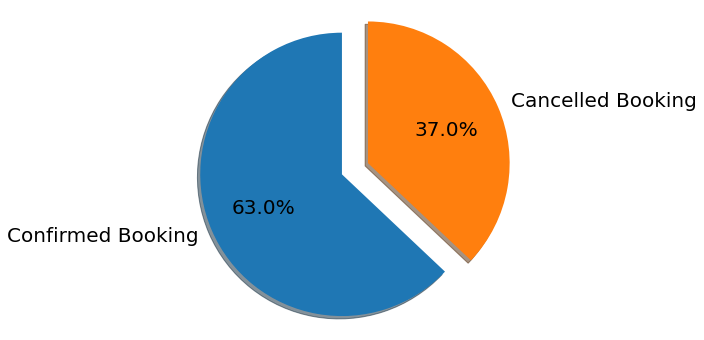

In [ ]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##Top 5 asal negara customer

Text(0.5, 1.0, 'Booked Hotel type by country')

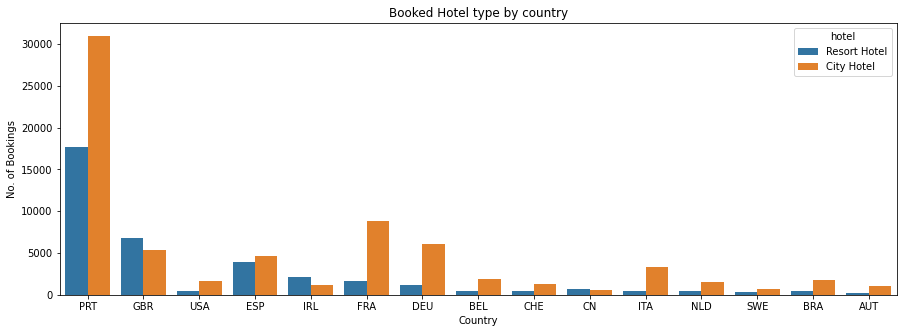

In [ ]:
d = df['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(15,5))
sns.countplot(x='country', hue='hotel', data=df[df['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

In [ ]:
d

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: country, dtype: int64

##Cancellation rate

In [ ]:
d = df.groupby(['hotel','arrival_date_month']).agg({'is_canceled':'sum', 'meal':'count'}).reset_index().rename(columns={'is_canceled':'cancelled_bookings', 'meal':'total_bookings'})
d['cancellation_percentage'] = (d['cancelled_bookings']/d['total_bookings'])*100
d.head()

,hotel,arrival_date_month,cancelled_bookings,total_bookings,cancellation_percentage
0,City Hotel,April,3465,7480,46.323529
1,City Hotel,August,3602,8983,40.097963
2,City Hotel,December,1740,4132,42.110358
3,City Hotel,February,1901,4965,38.288016
4,City Hotel,January,1482,3736,39.668094


In [ ]:
df['cancellation_percentage'] = (d['cancelled_bookings']/d['total_bookings'])*100
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,cancellation_percentage
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,46.323529
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,40.097963
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,42.110358
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,38.288016
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,39.668094


In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [ ]:
d = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)

##Tipe customer vs status pembatalan

Text(0, 0.5, 'Count')

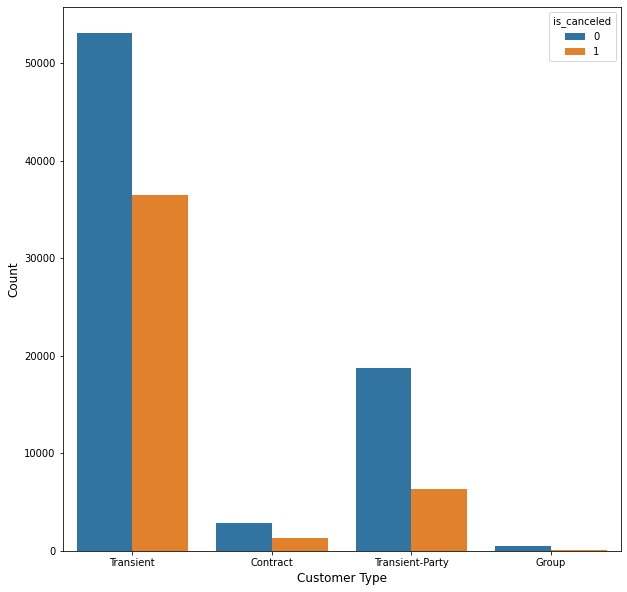

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='customer_type', data=df, hue='is_canceled')
#plt.title('Total Special Request', weight='bold')
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

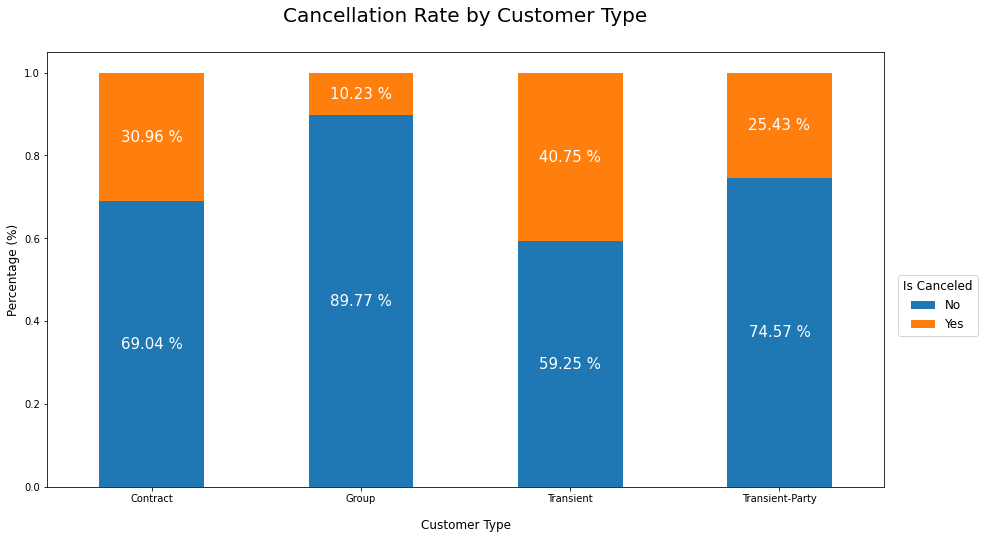

In [ ]:
customer_ax = pd.crosstab(df['customer_type'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in customer_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    customer_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Customer Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Customer Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

##Cancellation rate by Market Segment

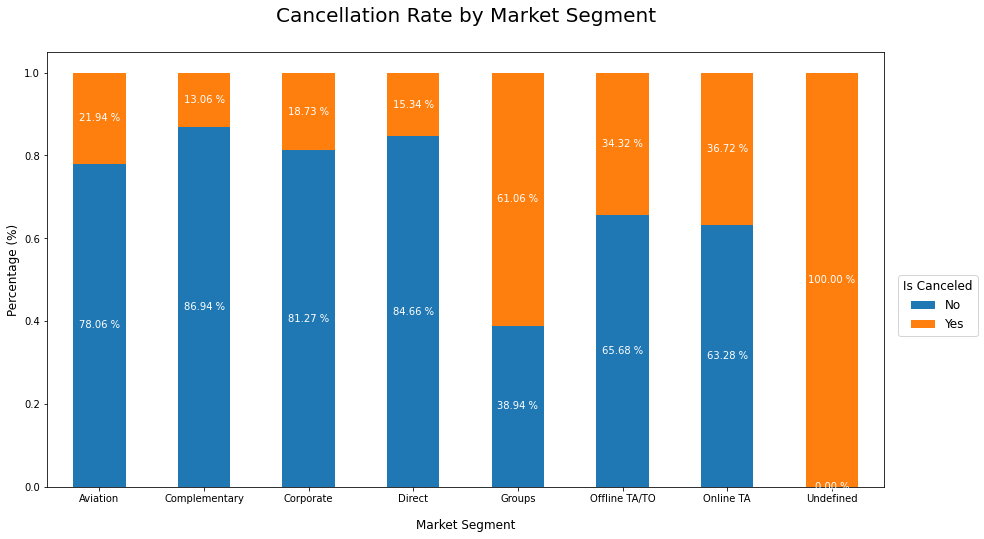

In [ ]:
market_ax = pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in market_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    market_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)
    
plt.title('Cancellation Rate by Market Segment', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Market Segment', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

##Deposit Type

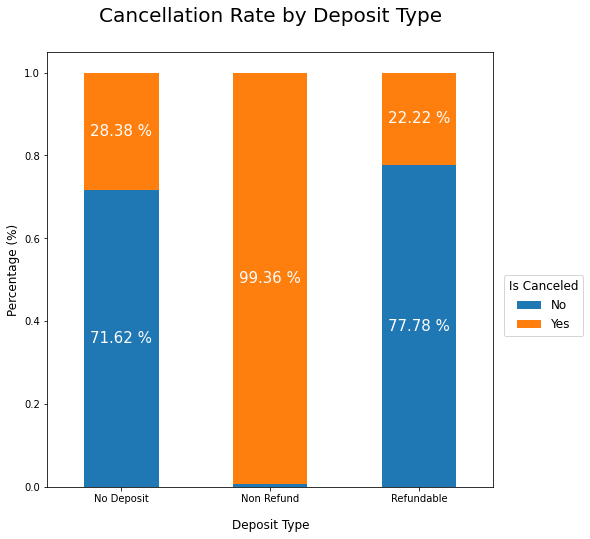

In [ ]:
deposit_ax = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for p in deposit_ax.patches:
    if j != 2:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      deposit_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    j += 1
    
plt.title('Cancellation Rate by Deposit Type', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

##Special Request

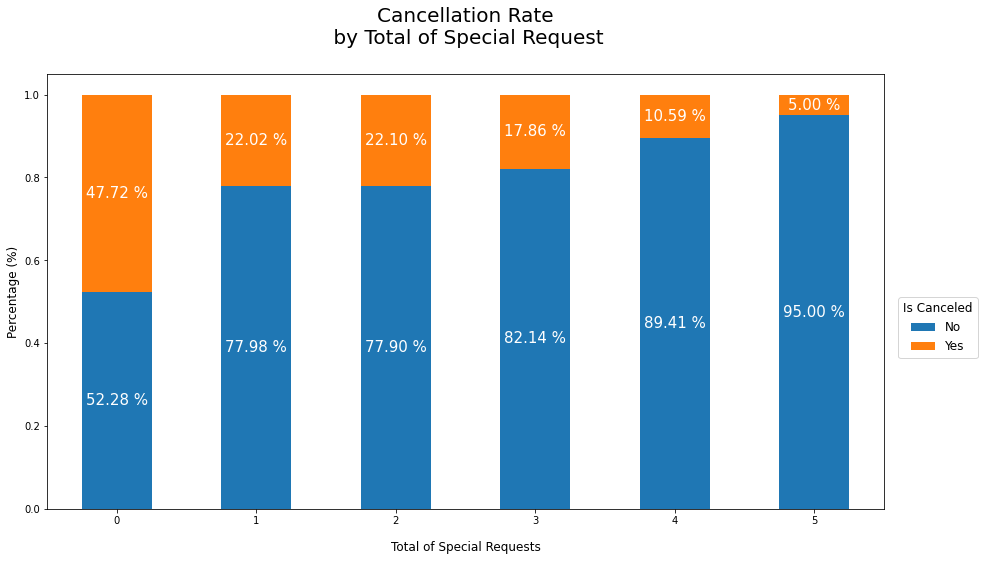

In [ ]:
request_ax = pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in request_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    request_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate\n by Total of Special Request', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Total of Special Requests', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

##Lead time cancellation

In [ ]:
df_lead_time = df.copy()
df_lead_time['lead_time_month'] = df_lead_time['lead_time'] // 30
df_lead_time = df_lead_time.groupby(['lead_time_month','is_canceled']).agg({'hotel':'count'}).reset_index()
df_lead_time = df_lead_time.rename(columns={'hotel':'total'})
df_lead_time['total_guests'] = df_lead_time.groupby(['lead_time_month'])['total'].transform('sum')

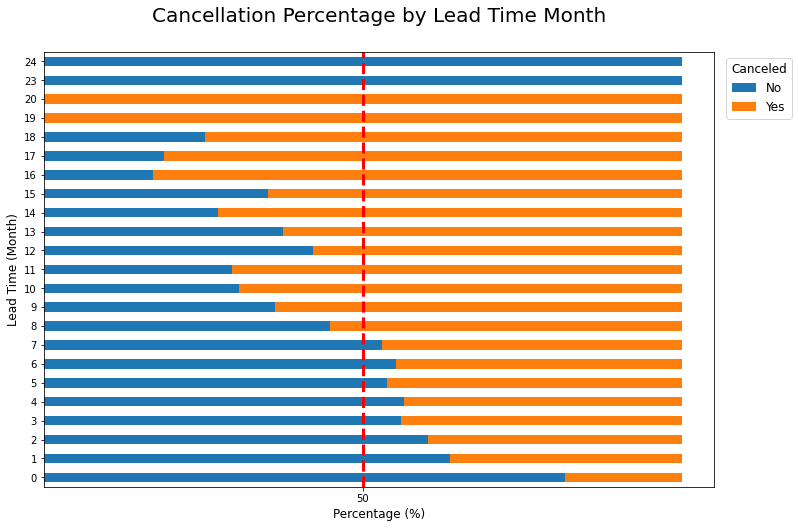

In [ ]:
df_lead_time_plot = df_lead_time.copy()
df_lead_time_plot['cancel_percentage'] = (df_lead_time_plot['total'] / df_lead_time_plot['total_guests']) * 100
df_lead_time_plot = df_lead_time_plot.sort_values('cancel_percentage', ascending=False)

df_lead_time_plot = df_lead_time_plot.pivot_table(index='lead_time_month', columns='is_canceled', values='cancel_percentage')

lead_time_ax = df_lead_time_plot.plot(kind='barh', stacked=True, figsize=(12,8))
plt.legend(bbox_to_anchor=(1.01, 1), title='Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
plt.title('Cancellation Percentage by Lead Time Month', fontsize=20, pad=30)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Lead Time (Month)', fontsize=12)
plt.axvline(50, color='red', linestyle='dashed', linewidth=3, label='50%')
#plt.annotate(s='',xy=(100,8), xytext=(110,8), arrowprops=dict(arrowstyle='<-', color='black'))
#plt.text(110, 7, 'Cancellation Ratio > 50%\nFor Lead Times\nStarting From 8 Months', horizontalalignment='left', size='medium', color='black')
lead_time_ax.set_xticks([50])
plt.show()

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

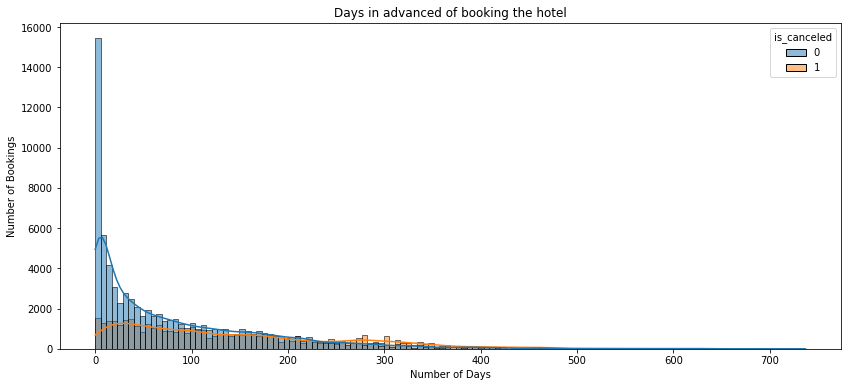

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(x='lead_time', hue='is_canceled', data=df, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

##Cancellation per months

Text(0.5, 1.0, 'Cancellations per month')

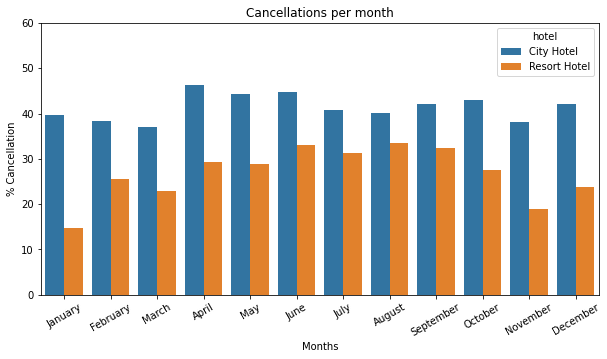

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='arrival_date_month', y='cancellation_percentage', hue='hotel', data=d, order=months)
plt.ylim((0,60))
plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("% Cancellation")
plt.title("Cancellations per month")